In [2]:
#Importando bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [3]:
#Caminho do dados e criando datasets para cada conjunto

path = r'D:\Python\dataset\train.csv' #dados de treino
path_teste = r'D:\Python\dataset\test.csv' #dados de teste

dados_teste = pd.read_csv(path_teste)
dados = pd.read_csv(path)

dados_backup = dados.copy() #backup de segurança do dataset

dados.head() #visualizando o dataset



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Informações básicas 

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Selecionando as colunas referentes a dados numéricos

dados_num = dados.select_dtypes(['float64', 'int64'])

dados_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [6]:
#Informações sobre os dados numéricos (valores máximos, mínimos, média, ...)

dados_num.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


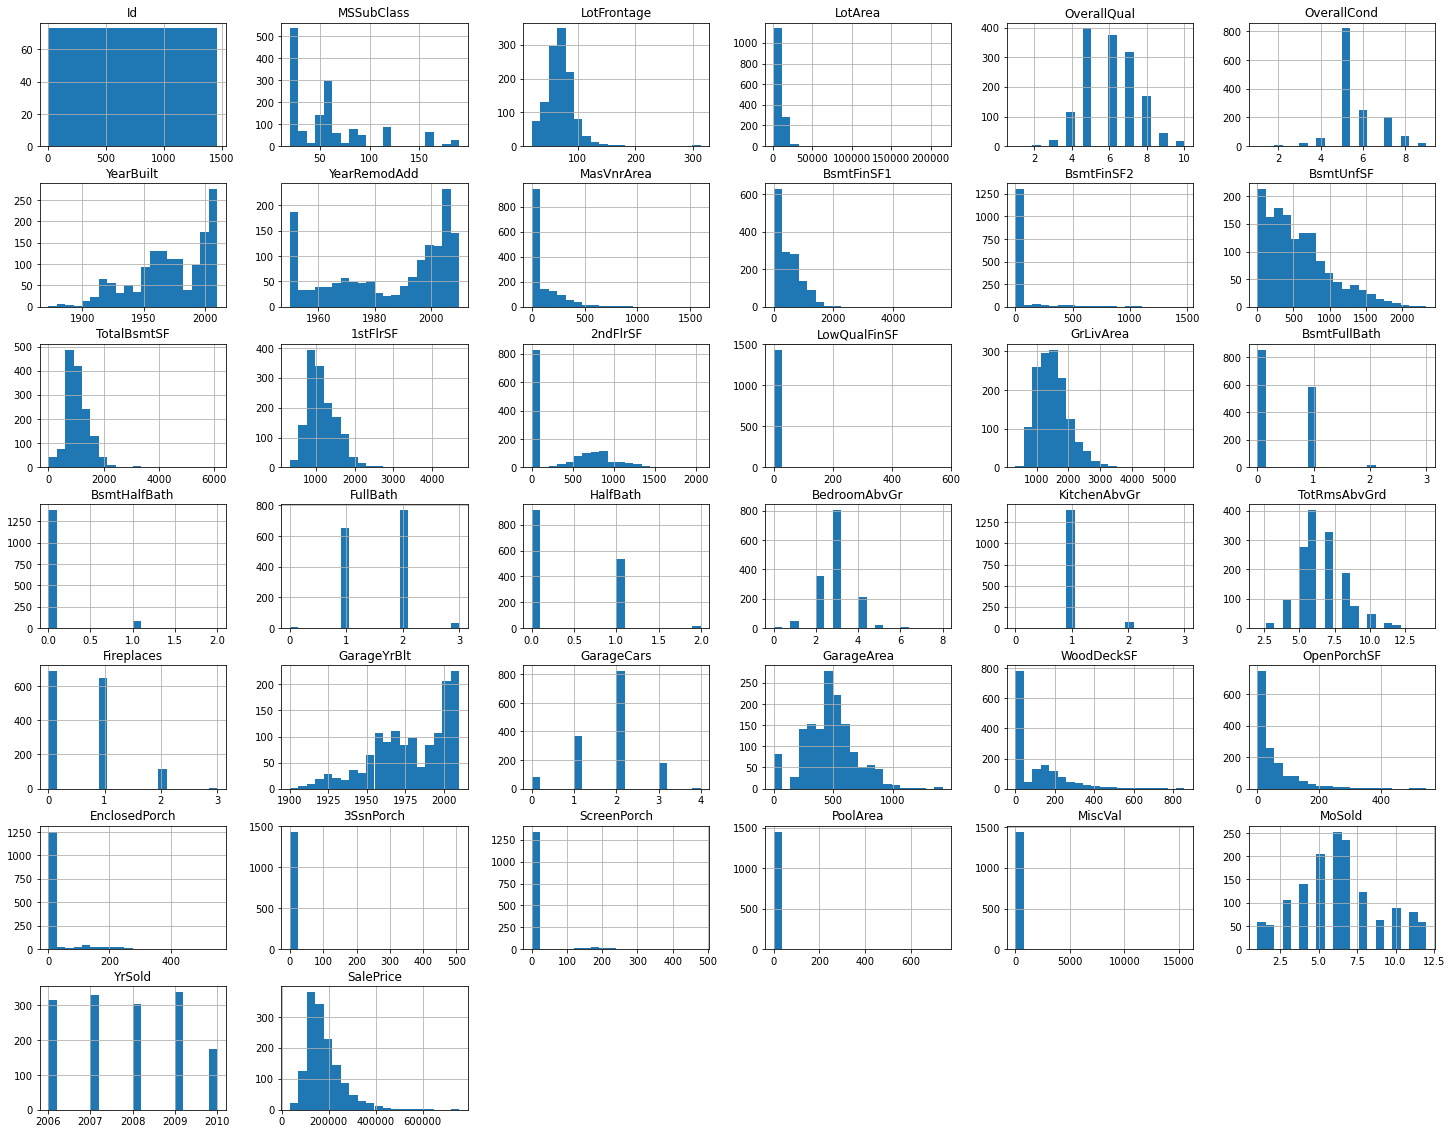

In [7]:
#Criando histogramas para visualizar a frequência de valores para cada variável

dados_num.hist(bins=20, figsize=(25,20))
plt.show()

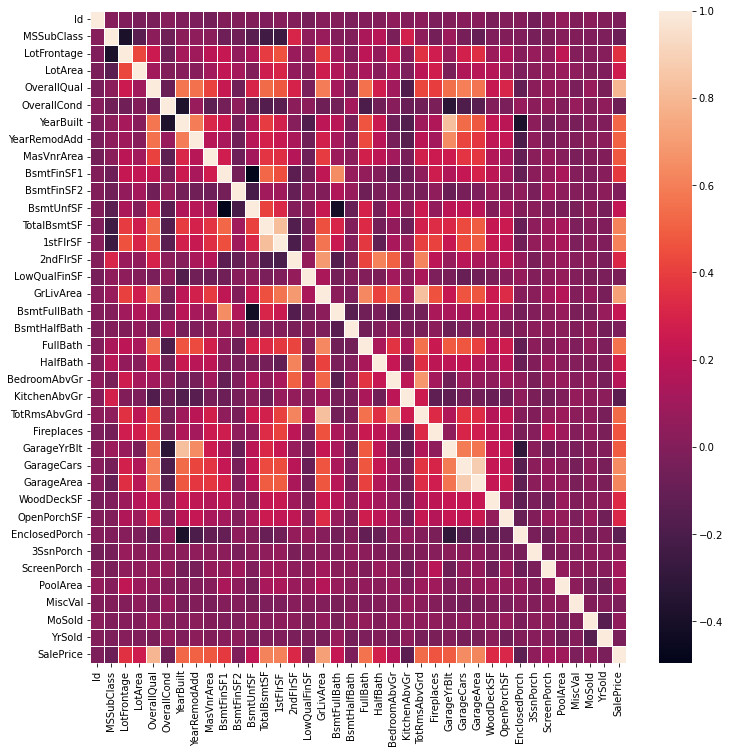

In [8]:
#Para observar a "influência" de cada variável no preço de venda "SalePrice", podemos contruir
#uma matriz de correlação

#Matriz de correlação nos fornece a intensidade de conexão entre as variáveis

dados_corr = dados.corr(method='pearson')

plt.figure(figsize=(12,12))
sns.heatmap(dados_corr, linewidths=.5, annot=False)
plt.show()

In [9]:
#Desta matriz, extraímos os índices referentes as variáveis mais influentes no preço de venda

indx = dados_corr.index[abs(dados_corr['SalePrice'])>0.4]
var_inf = indx.copy() #backup dos índices
print(indx)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')


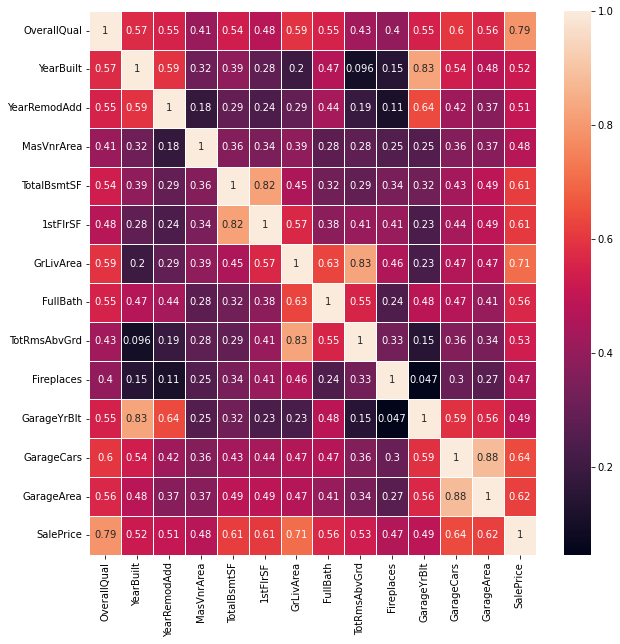

In [10]:
#Criando um novo dataset com as variáveis influentes

dados_inf = dados_num[var_inf]

#Visualizando em mais detalhes uma matriz de correlação com mas variáveis mais influêntes

plt.figure(figsize=(10,10))
mat_corr = sns.heatmap(dados_inf.corr(method='pearson'), linewidths=.5, annot=True)

In [11]:
#Podemos agora verificar os dados faltantes no nosso novo dataset

faltantes = dados_inf.isnull().sum().sort_values(ascending=False)
porcentagem = (dados_inf.isnull().sum()/dados_inf.isnull().count()).sort_values(ascending=False)

#.sum() soma o valor dos elementos enquanto .count() conta o número de elementos

dados_faltantes = pd.concat([faltantes, porcentagem], axis=1, keys=['faltantes', '%'])

print(dados_faltantes)



              faltantes         %
GarageYrBlt          81  0.055479
MasVnrArea            8  0.005479
OverallQual           0  0.000000
YearBuilt             0  0.000000
YearRemodAdd          0  0.000000
TotalBsmtSF           0  0.000000
1stFlrSF              0  0.000000
GrLivArea             0  0.000000
FullBath              0  0.000000
TotRmsAbvGrd          0  0.000000
Fireplaces            0  0.000000
GarageCars            0  0.000000
GarageArea            0  0.000000
SalePrice             0  0.000000


In [18]:
#Uma solução para tratar estes dados faltantes para poder inseri-los no nosso modelo é substituindo seu valor pela média

dados_inf['GarageYrBlt'].fillna(dados_inf['GarageYrBlt'].mean(), inplace=True)
dados_inf['MasVnrArea'].fillna(dados_inf['MasVnrArea'].mean(), inplace=True)

#inplace=True salva a alteração no dataframe original

#Assim excluímos os valores faltantes

print(dados_faltantes)

              faltantes         %
GarageYrBlt          81  0.055479
MasVnrArea            8  0.005479
OverallQual           0  0.000000
YearBuilt             0  0.000000
YearRemodAdd          0  0.000000
TotalBsmtSF           0  0.000000
1stFlrSF              0  0.000000
GrLivArea             0  0.000000
FullBath              0  0.000000
TotRmsAbvGrd          0  0.000000
Fireplaces            0  0.000000
GarageCars            0  0.000000
GarageArea            0  0.000000
SalePrice             0  0.000000


d:\Anaconda\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [13]:
#Separação das variáveis preditívas e alvo

x = dados_inf.drop('SalePrice', axis=1)
y = dados_inf['SalePrice']

#criando um subgrupo de dados teste/treino para validar e otimizar o modelo

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

#com isso, separamos 70% dos nossos dados para treino

In [23]:
#Selecionando o modelo

modelo = RandomForestRegressor()
modelo.fit(x, y) #treinando o modelo com os dados de treino

#introduzindo os dados de teste

dados_teste_inf = dados_teste[indx.drop('SalePrice')]
print(dados_teste_inf)


      OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  TotalBsmtSF  1stFlrSF  \
0               5       1961          1961         0.0        882.0       896   
1               6       1958          1958       108.0       1329.0      1329   
2               5       1997          1998         0.0        928.0       928   
3               6       1998          1998        20.0        926.0       926   
4               8       1992          1992         0.0       1280.0      1280   
...           ...        ...           ...         ...          ...       ...   
1454            4       1970          1970         0.0        546.0       546   
1455            4       1970          1970         0.0        546.0       546   
1456            5       1960          1996         0.0       1224.0      1224   
1457            5       1992          1992         0.0        912.0       970   
1458            7       1993          1994        94.0        996.0       996   

      GrLivArea  FullBath  

In [24]:
#Dados faltantes e substituição pelas médias

print(dados_teste_inf.isnull().sum().sort_values(ascending=False))

GarageYrBlt     78
MasVnrArea      15
TotalBsmtSF      1
GarageCars       1
GarageArea       1
OverallQual      0
YearBuilt        0
YearRemodAdd     0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
Fireplaces       0
dtype: int64


In [25]:
dados_teste_inf['GarageYrBlt'].fillna(dados_teste_inf['GarageYrBlt'].mean(), inplace=True)
dados_teste_inf['MasVnrArea'].fillna(dados_teste_inf['MasVnrArea'].mean(), inplace=True)
dados_teste_inf['TotalBsmtSF'].fillna(dados_teste_inf['TotalBsmtSF'].mean(), inplace=True)
dados_teste_inf['GarageCars'].fillna(dados_teste_inf['GarageCars'].mean(), inplace=True)
dados_teste_inf['GarageArea'].fillna(dados_teste_inf['GarageArea'].mean(), inplace=True)

d:\Anaconda\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [28]:
#Agora podemos aplicar nosso modelo aos dados de teste para fazer uma previsão dos preços de venda "SalePrice"

SalePrice = modelo.predict(dados_teste_inf)

#Por fim, criamos um dataframe contendo a ID da casa e seu respectivo preço

resultado = pd.DataFrame({'Id':dados_teste['Id'], 'SalePrice': SalePrice})
print(resultado)

        Id      SalePrice
0     1461  121541.490000
1     1462  141285.500000
2     1463  173689.600000
3     1464  181282.000000
4     1465  209157.240000
...    ...            ...
1454  2915   84453.333333
1455  2916   84680.000000
1456  2917  152791.500000
1457  2918  109173.000000
1458  2919  237192.520000

[1459 rows x 2 columns]
